# Ventas
Reto: Realizar un Análisis Exploratorio de Datos (EDA) sobre la información y emplear modelos para predecir las cantidades en función de las características proporcionadas.

In [1]:
#Librerias
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Lectura de Datos
from google.colab import drive
drive.mount('/gdrive')

id_del_archivo = '1oiV4StpAdtQb1_BI8dX2KAWXiNdzH1aj'
url = f'https://drive.google.com/uc?id={id_del_archivo}'

# Descarga el archivo usando gdown
output = 'archivo.parquet'
gdown.download(url, output, quiet=False)
data = pd.read_parquet(output)

Mounted at /gdrive


Downloading...
From: https://drive.google.com/uc?id=1oiV4StpAdtQb1_BI8dX2KAWXiNdzH1aj
To: /content/archivo.parquet
100%|██████████| 31.5M/31.5M [00:00<00:00, 110MB/s] 


In [7]:
print(data.shape)
data.head(6661284)

(6661284, 7)


,Centro,Año/Mes,Material,Cantidad,Artículo,TALLA,COLOR
0,T036,2021|12,5133961,1.0,CAMISETA,16,Blanco 10-0000
1,T036,2021|12,5133961,1.0,CAMISETA,16,Blanco 10-0000
2,T036,2021|12,5133961,1.0,CAMISETA,16,Blanco 10-0000
3,T036,2021|12,5133961,1.0,CAMISETA,16,Blanco 10-0000
4,T036,2021|12,5133961,1.0,CAMISETA,16,Blanco 10-0000
...,...,...,...,...,...,...,...
6661279,T043,2021|12,4224120,1.0,CAMISETA,3T,Rosado 11-1408
6661280,T043,2021|12,4224120,1.0,CAMISETA,3T,Rosado 11-1408
6661281,T043,2021|12,4224120,1.0,CAMISETA,3T,Rosado 11-1408
6661282,T043,2021|10,4224120,1.0,CAMISETA,3T,Rosado 11-1408


### **Limpieza de Datos**
SET de Datos.
Explicación de las variables:


*   Centro: Código que representa una tienda de OFFCORSS
*   Año/Mes: No rquiere explicación
*   Material: Referencia de un producto
*   Cantidad: cifra numérica que representa cuántas unidades de un producto específico están siendo impactadas por cada
*   Artículo: Conjunto o agrupación de productos relacionados.
*  Talla: Talla de la referencia o producto.
*   Color: Código de color de la referencia o producto.

In [7]:
# Obtener la cantidad de transacciones por centro
cantidad_por_centro = data['Centro'].value_counts().reset_index()
cantidad_por_centro.columns = ['Centro', 'Cantidad de Transacciones']

# Filtrar centros con al menos una transacción
centros_con_transacciones = cantidad_por_centro[cantidad_por_centro['Cantidad de Transacciones'] > 0]


In [8]:
#tener la columna
data['Cantidad'] = pd.to_numeric(data['Cantidad'], errors='coerce')

# Eliminar filas con valores no válidos en 'Cantidad' (NaN después de la conversión)
data = data.dropna(subset=['Cantidad'])

# Convertir 'Cantidad' de float a int
data['Cantidad'] = data['Cantidad'].astype(int)

In [9]:
#tener la columna
data['Cantidad'] = pd.to_numeric(data['Cantidad'])

# Seleccionar registros donde la cantidad es diferente de -1 o menor de 0
data = data[data['Cantidad'] > 0]

# Mostrar el DataFrame
print(data)

        Centro  Año/Mes Material  Cantidad  Artículo TALLA           COLOR
0         T036  2021|12  5133961         1  CAMISETA    16  Blanco 10-0000
1         T036  2021|12  5133961         1  CAMISETA    16  Blanco 10-0000
2         T036  2021|12  5133961         1  CAMISETA    16  Blanco 10-0000
3         T036  2021|12  5133961         1  CAMISETA    16  Blanco 10-0000
4         T036  2021|12  5133961         1  CAMISETA    16  Blanco 10-0000
...        ...      ...      ...       ...       ...   ...             ...
6661279   T043  2021|12  4224120         1  CAMISETA    3T  Rosado 11-1408
6661280   T043  2021|12  4224120         1  CAMISETA    3T  Rosado 11-1408
6661281   T043  2021|12  4224120         1  CAMISETA    3T  Rosado 11-1408
6661282   T043  2021|10  4224120         1  CAMISETA    3T  Rosado 11-1408
6661283   T043  2021|10  4224120         1  CAMISETA    3T  Rosado 11-1408

[6374841 rows x 7 columns]


In [113]:
#Opcional
#data = data.drop(columns='Cantidad')

In [10]:
# Obtener la cantidad de transacciones por centro
cantidad_por_centro = data['Centro'].value_counts().reset_index()
cantidad_por_centro.columns = ['Centro', 'Cantidad de Transacciones']

# Filtrar centros con al menos una transacción
centros_con_transacciones = cantidad_por_centro[cantidad_por_centro['Cantidad de Transacciones'] > 0]

In [11]:
# Eliminar filas con valores nulos o vacíos en la columna 'Artículo'
data = data.dropna(subset=['Artículo'])

# Eliminar filas que contienen las cadenas 'No Aplica', 'NO APLICA' o valores vacíos en la columna 'Artículo'
data = data[~data['Artículo'].isin(['NA', 'NO APLICA', ''])]

# Restablecer el índice después de eliminar filas
data = data.reset_index(drop=True)


### **Análisis Exploratorio de Datos**

In [12]:
# Descripción general del conjunto de datos
print("Número de registros y variables:")
print(data.shape)
print("\nTipos de datos:")
print(data.dtypes)
print("\nValores únicos por variable:")
print(data.nunique())
print("\nEstadísticas descriptivas:")
print(data.describe())


Número de registros y variables:
(6373902, 7)

Tipos de datos:
Centro      object
Año/Mes     object
Material    object
Cantidad     int64
Artículo    object
TALLA       object
COLOR       object
dtype: object

Valores únicos por variable:
Centro        129
Año/Mes        25
Material    11457
Cantidad        3
Artículo       30
TALLA          85
COLOR         999
dtype: int64

Estadísticas descriptivas:
           Cantidad
count  6.373902e+06
mean   1.000003e+00
std    1.771380e-03
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    3.000000e+00


### **Variables Categóricas:**

In [13]:
# Obtener la cantidad de transacciones por centro y ordenar de mayor a menor
cantidad_por_centro = data['Centro'].value_counts().reset_index()
cantidad_por_centro.columns = ['Centro', 'Cantidad de Transacciones']
cantidad_por_centro = cantidad_por_centro.sort_values(by='Cantidad de Transacciones', ascending=False)
print(cantidad_por_centro)

    Centro  Cantidad de Transacciones
0     T036                     287327
1     T094                     265695
2     T041                     200475
3     T060                     185054
4     T037                     179641
..     ...                        ...
124   T072                        734
125   T005                        326
126   FN41                        232
127   T088                         53
128   T061                         12

[129 rows x 2 columns]


# **Estadísticas descriptivas para variables categóricas**


Análisis para la variable categórica: Centro
T036    287327
T094    265695
T041    200475
T060    185054
T037    179641
         ...  
T072       734
T005       326
FN41       232
T088        53
T061        12
Name: Centro, Length: 129, dtype: int64


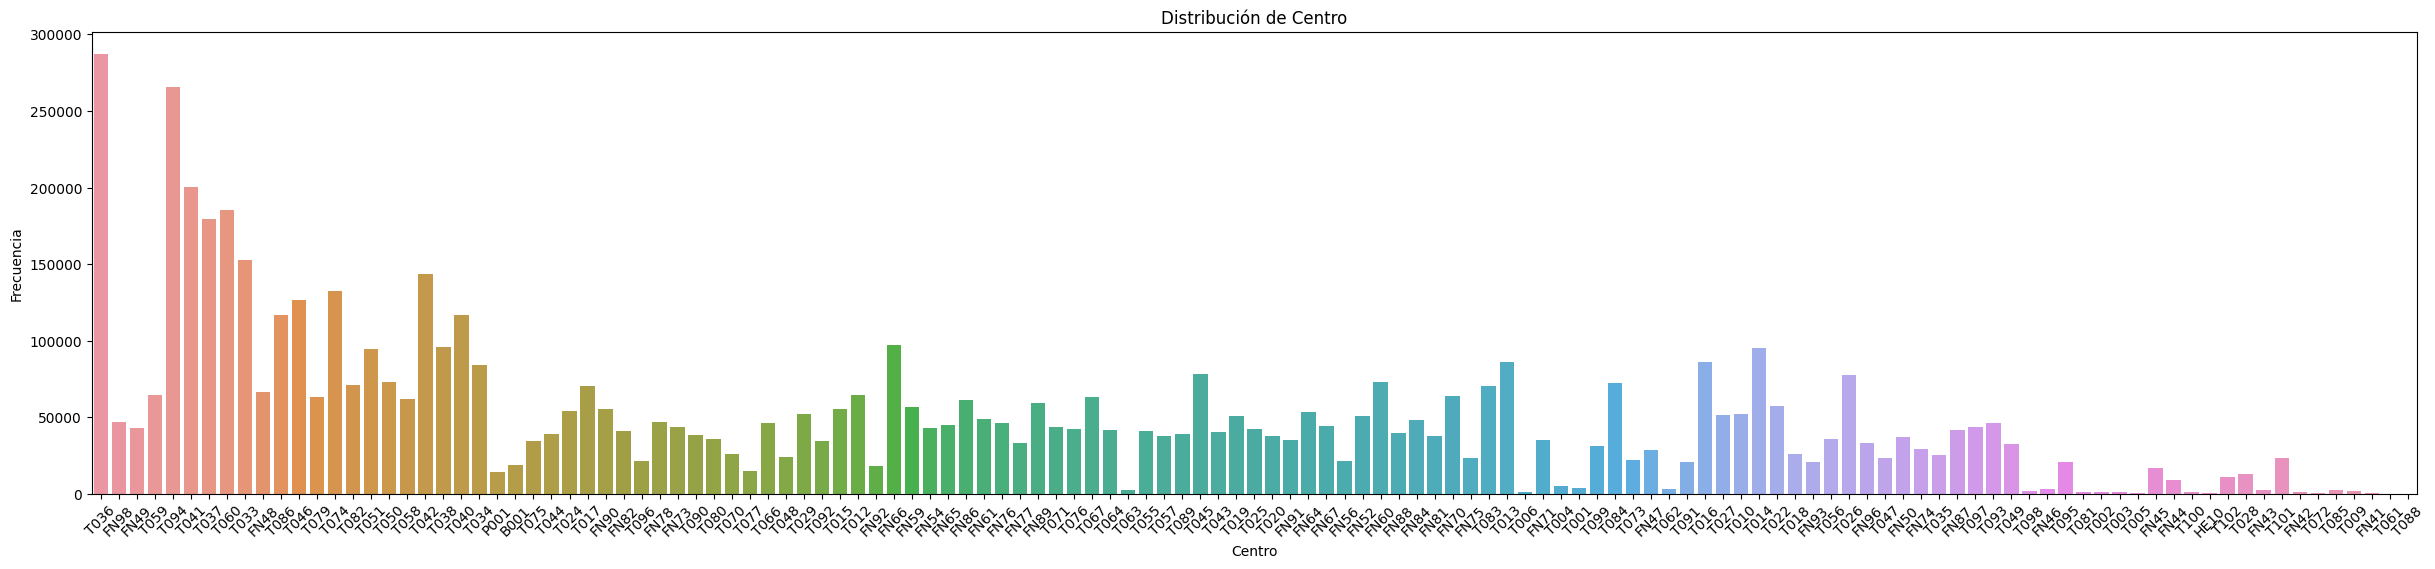


Análisis para la variable categórica: Año/Mes
2021|12    833265
2022|12    813690
2022|11    421290
2021|11    409901
2022|10    270322
2021|10    270068
2022|6     255694
2023|6     248437
2022|7     234901
2022|8     223980
2021|9     223925
2023|8     222760
2023|7     210504
2022|9     207820
2022|5     180802
2023|5     180042
2022|4     178760
2023|4     175533
2022|3     163875
2023|3     145442
2022|1     125846
2022|2     124427
2023|1     124373
2023|2     110037
2021|8      18208
Name: Año/Mes, dtype: int64


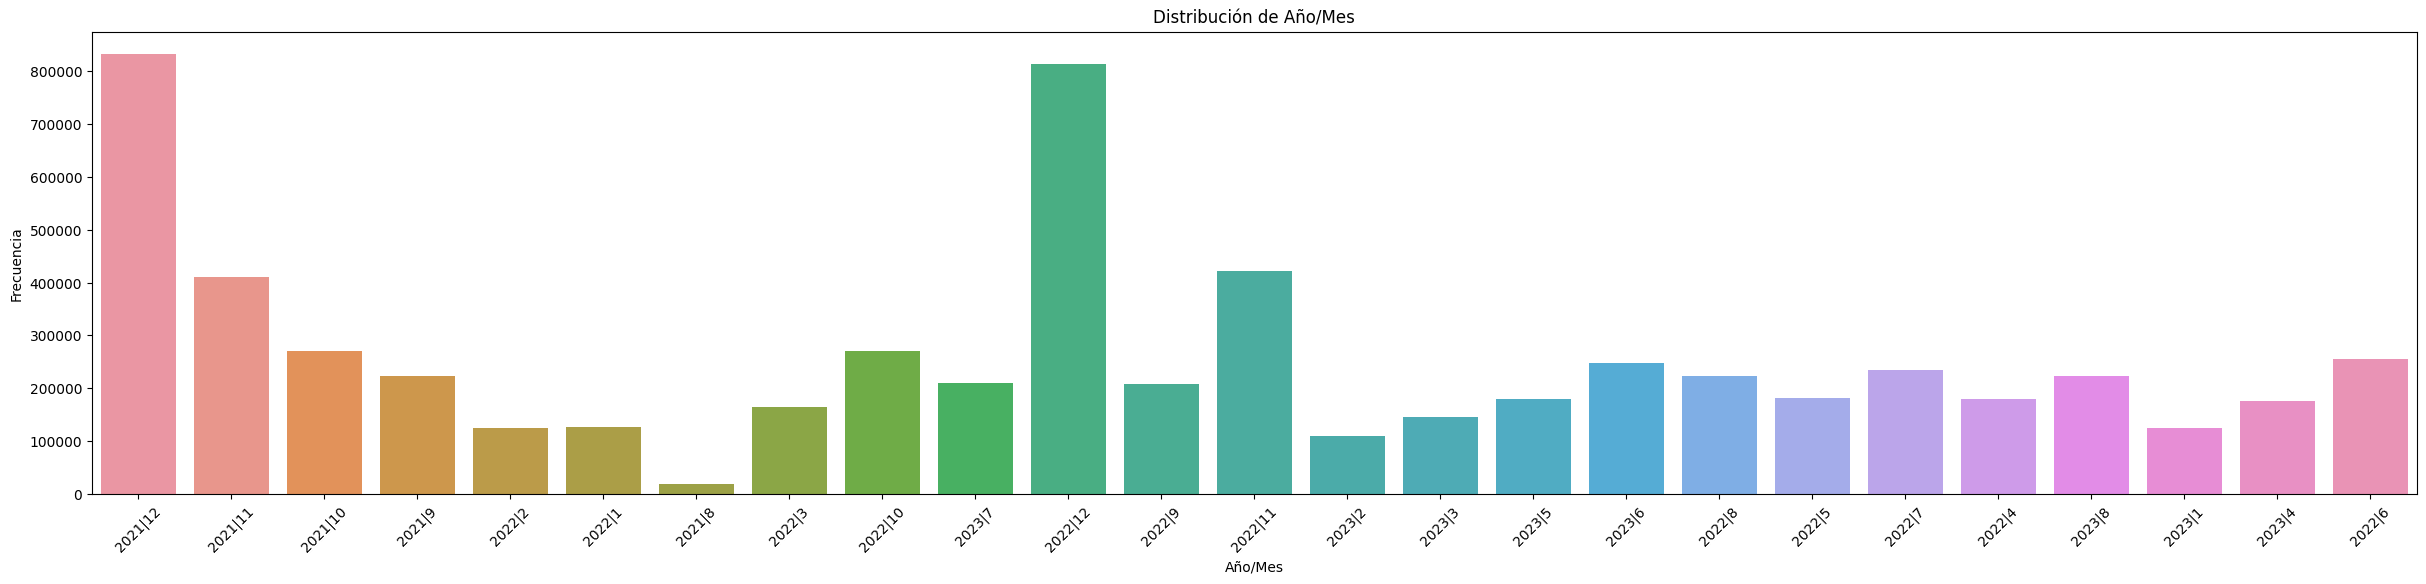


Análisis para la variable categórica: Material
5136108    37010
4136096    19553
5133961    19002
4114346    17676
5133907    16561
           ...  
5233427        1
3213330        1
4210332        1
3314611        1
3210252        1
Name: Material, Length: 11457, dtype: int64


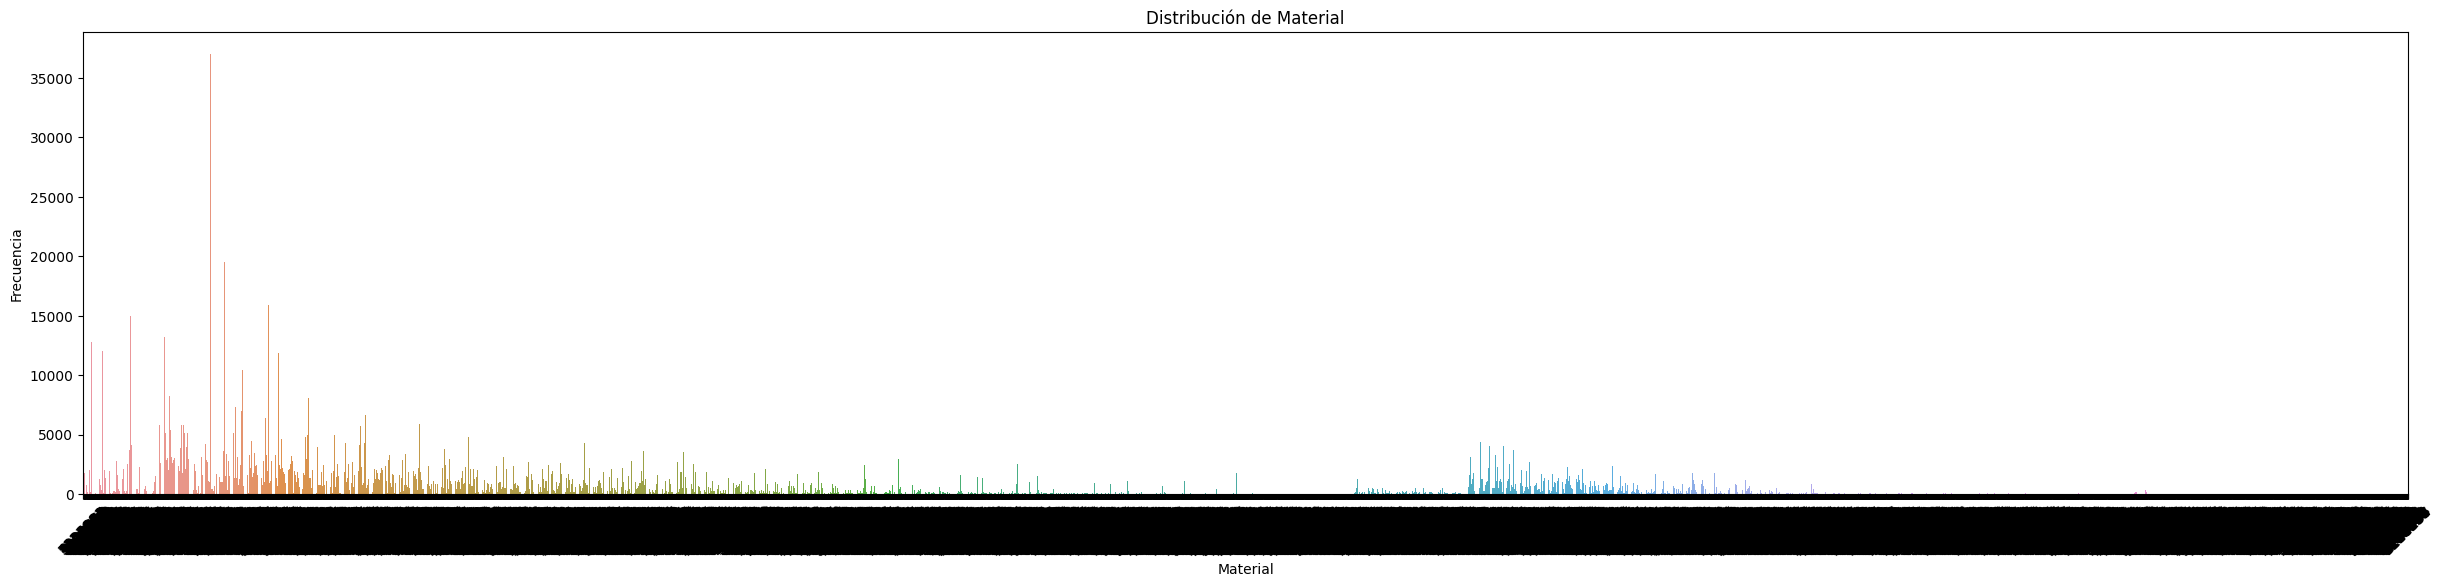


Análisis para la variable categórica: Artículo
CAMISETA             1569085
CALZADO               639547
DENIM                 567663
CONJUNTO              522928
BUZO O CHAQUETA       456455
PANTALON LARGO        381969
PANTALON CORTO        355004
CAMISA                302711
VESTIDO               213990
BODY                  210006
SET                   200234
PIJAMA                172268
OVERALL               131792
TAPABOCAS             120754
ACCESORIO             117140
MEDIAS                 94902
CUIDADO PERSONAL       93585
ROPA DE BAÑO           81834
ENTERIZO EXTERIOR      44637
FALDA                  40520
SOMBRERO               14196
TOP INTERIOR           11838
PANTY                   7570
MISCELÁNEOS             5347
PANTALONCILLO           4425
TOP                     4346
ROPA HOGAR              4139
COBIJA                  4073
TENDIDO DE CAMA          751
SABANA                   193
Name: Artículo, dtype: int64


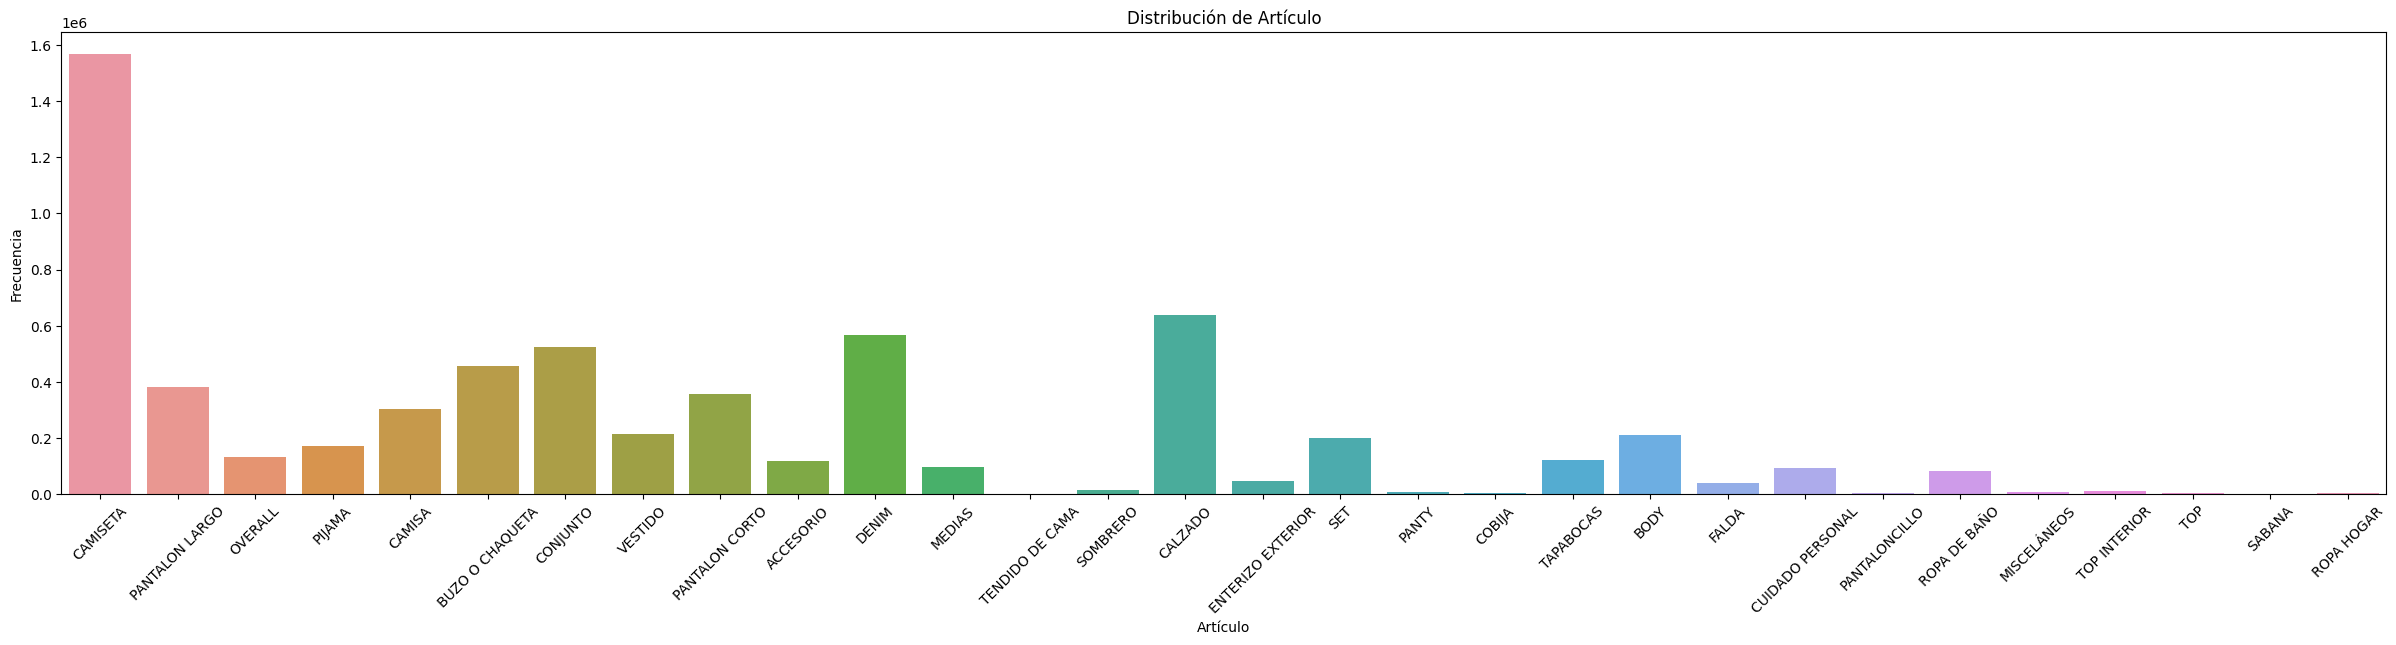


Análisis para la variable categórica: TALLA
12      627099
10      489196
8       471747
4T      433081
5T      425000
         ...  
242T        26
2526         7
2324         3
N/A          3
             1
Name: TALLA, Length: 85, dtype: int64


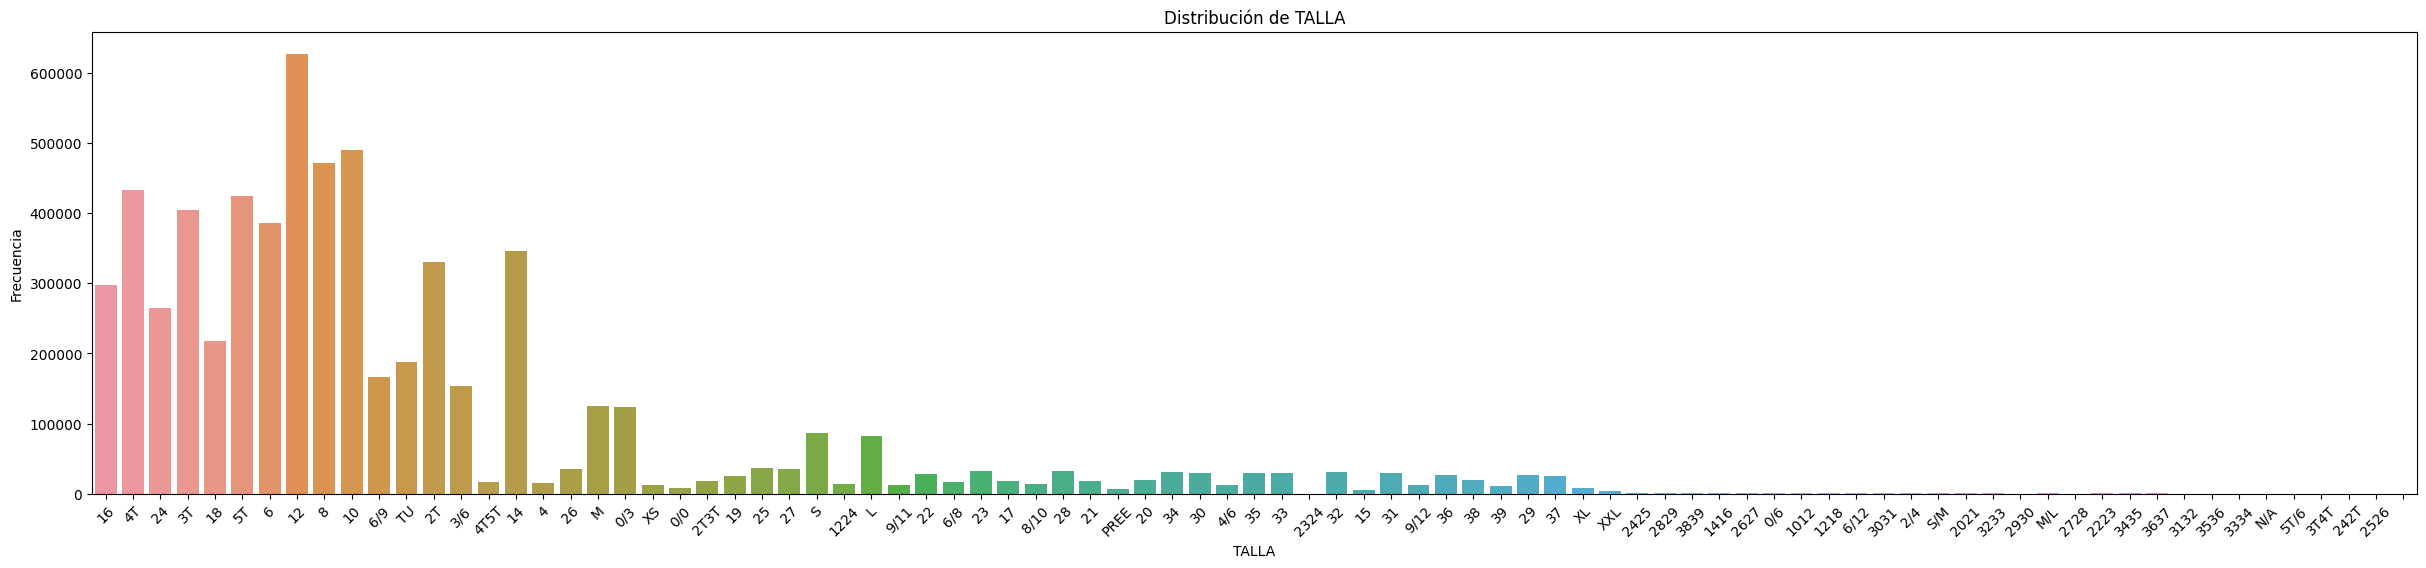


Análisis para la variable categórica: COLOR
Blanco 10-0000      927033
Azul 19-4024        535905
Indigo Medio        358075
Café 12-0601        350178
Negro 19-4008       343582
                     ...  
Verde 15-0318            1
Gris 17-1502             1
Cafe 19-1015             1
Amarillo 13-0746         1
Amarillo 14-1064         1
Name: COLOR, Length: 999, dtype: int64


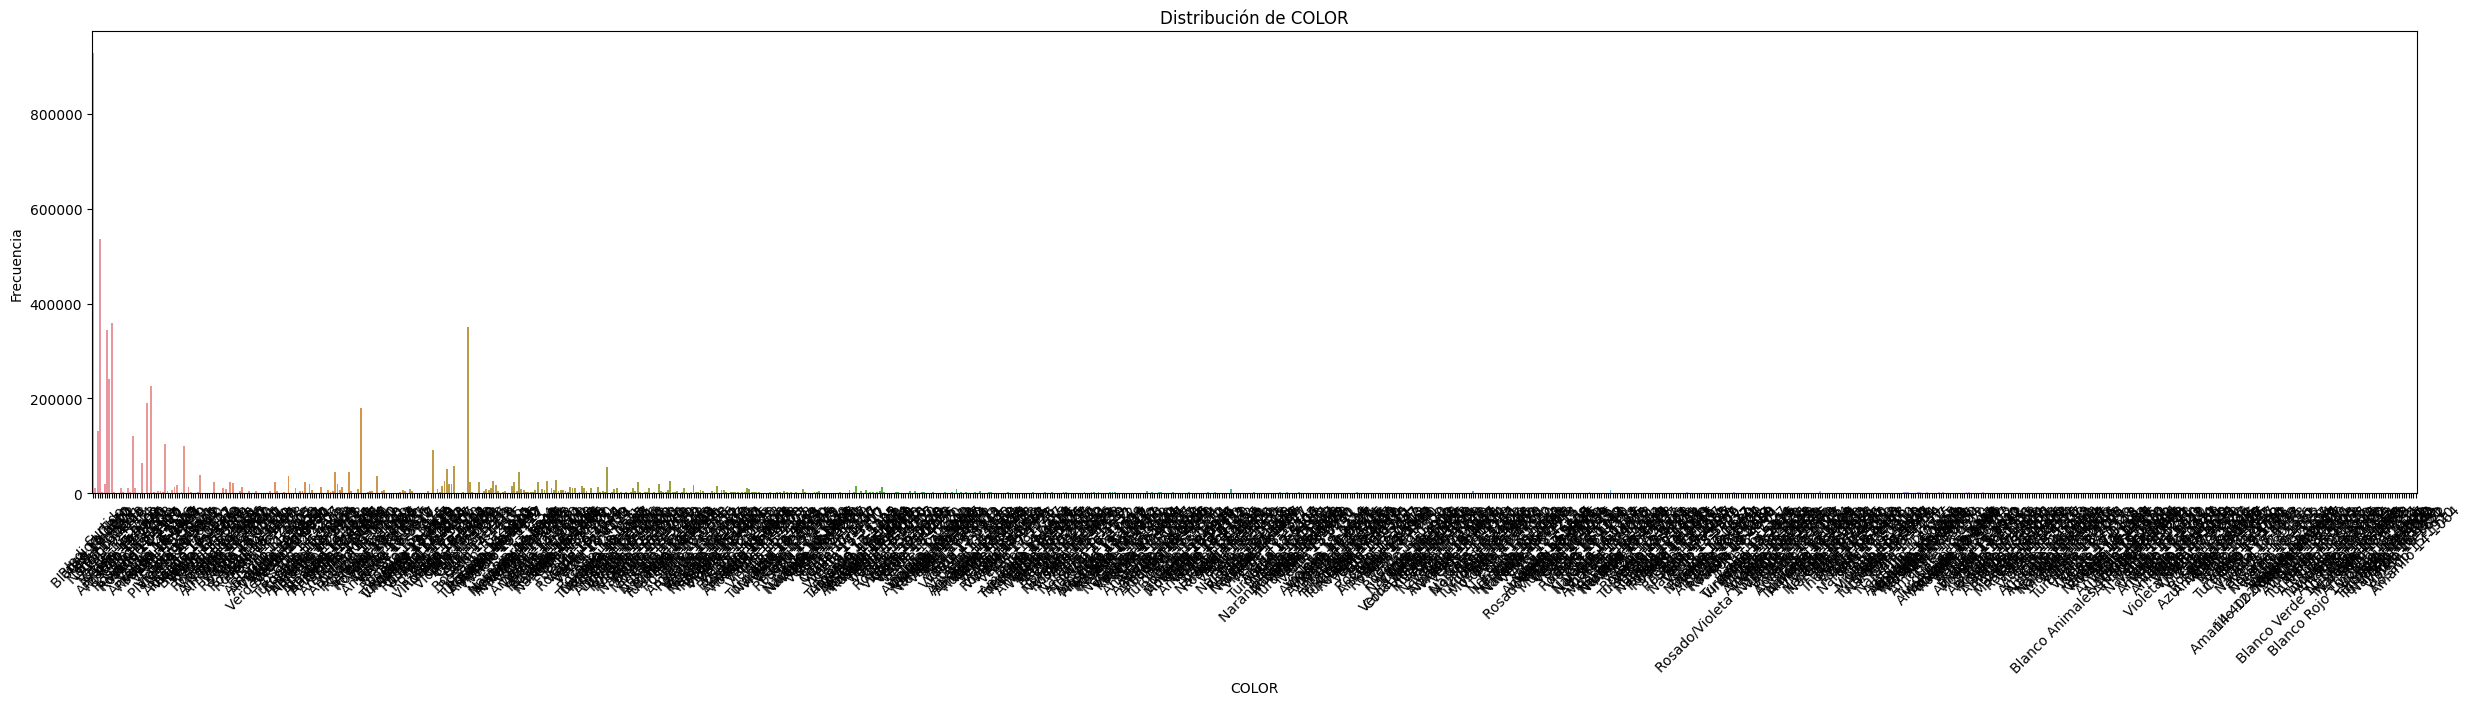

In [14]:
# Visualización y estadísticas descriptivas para variables categóricas
variables_categoricas = ['Centro', 'Año/Mes', 'Material', 'Artículo', 'TALLA', 'COLOR']
for variable in variables_categoricas:
    print(f"\nAnálisis para la variable categórica: {variable}")
    print(data[variable].value_counts())
    plt.figure(figsize=(30, 6))
    sns.countplot(x=variable, data=data)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


**Visualización univariable TOP 15:**

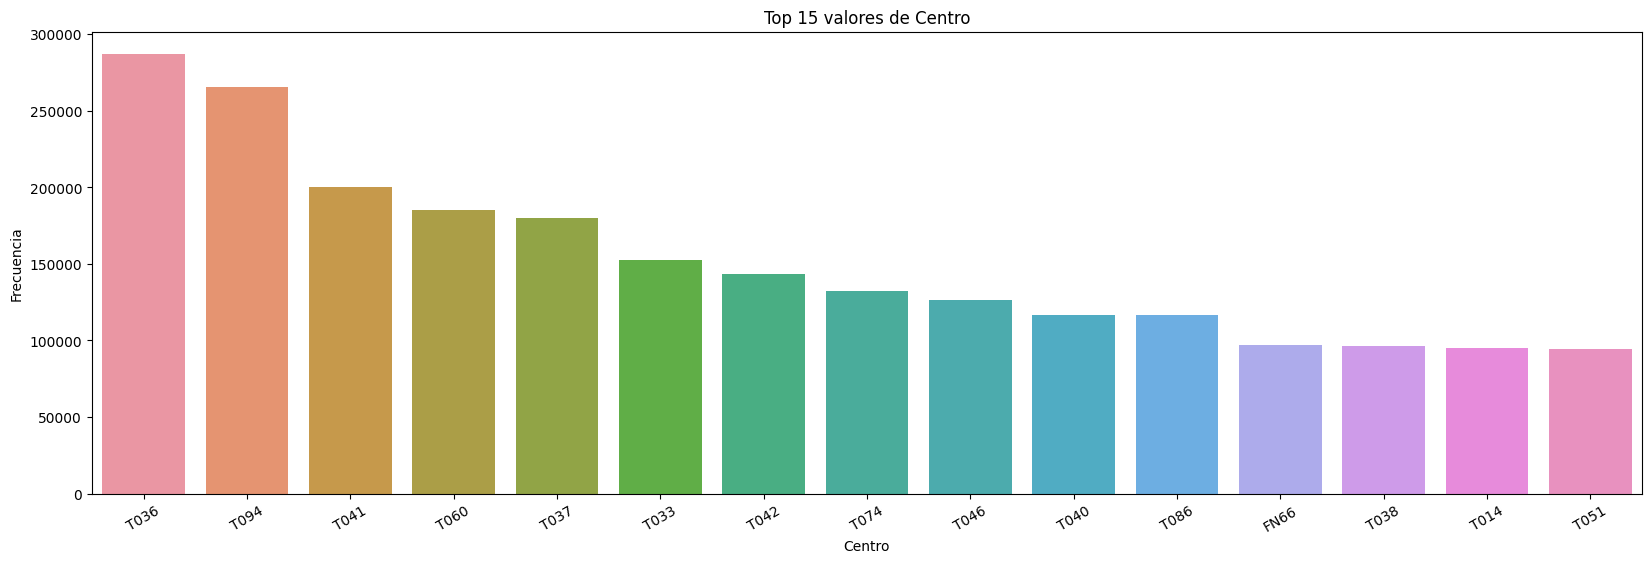

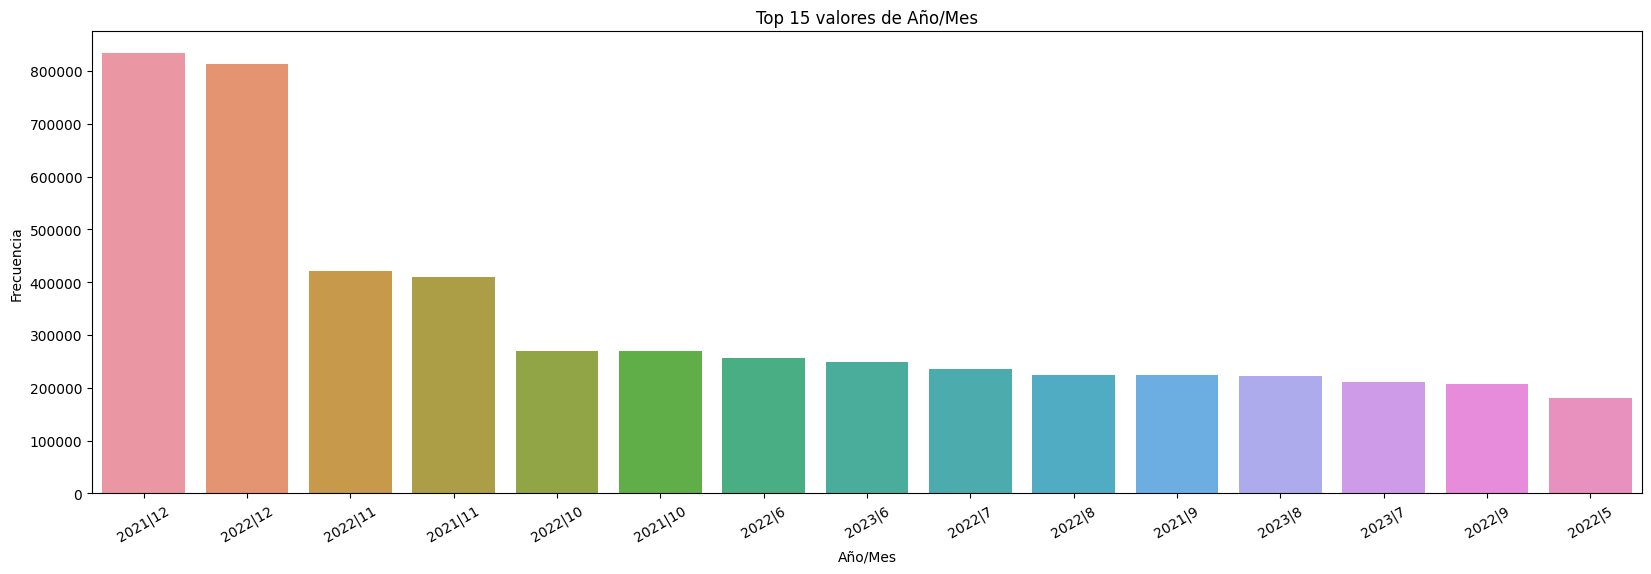

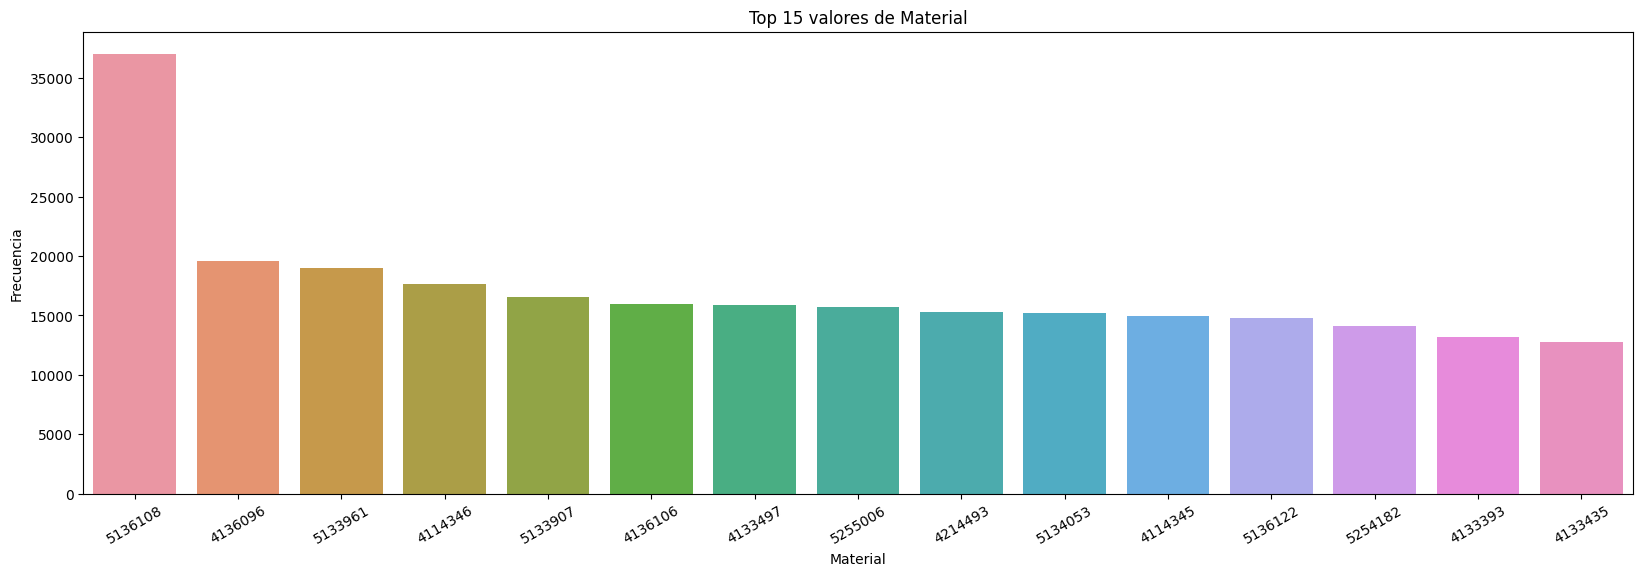

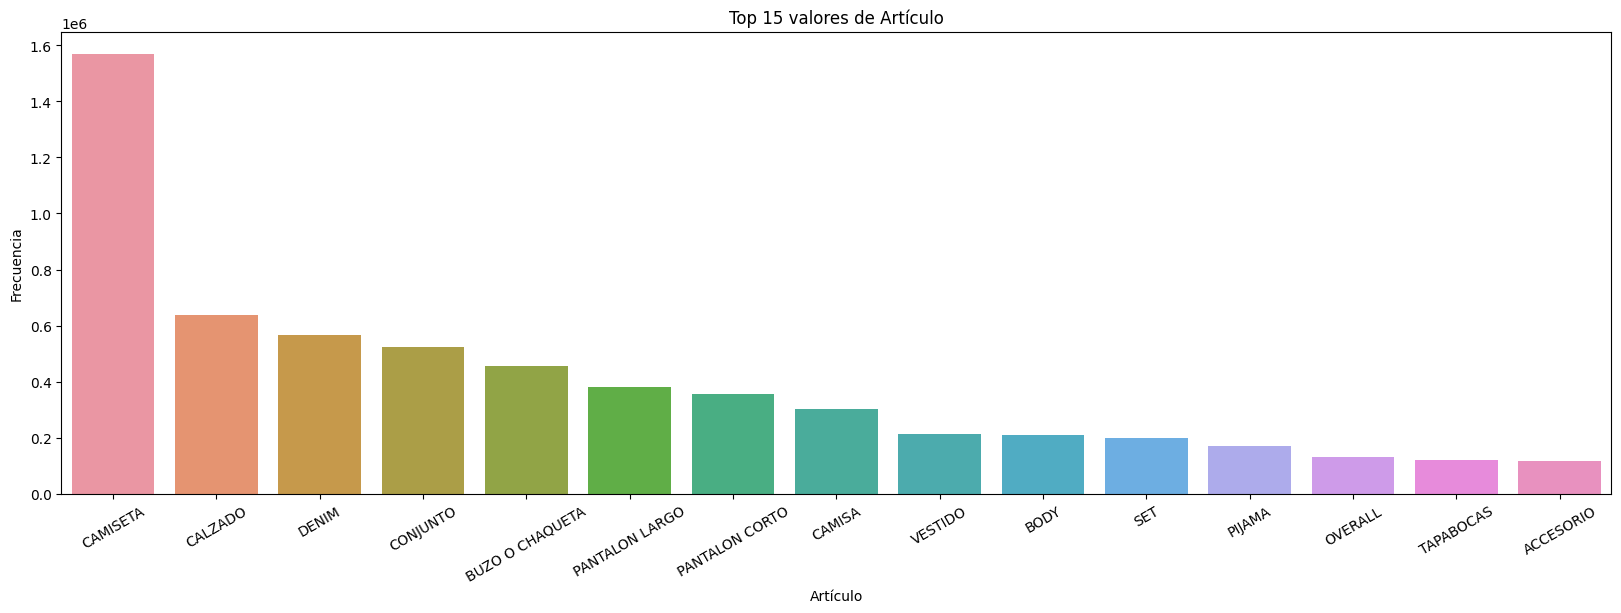

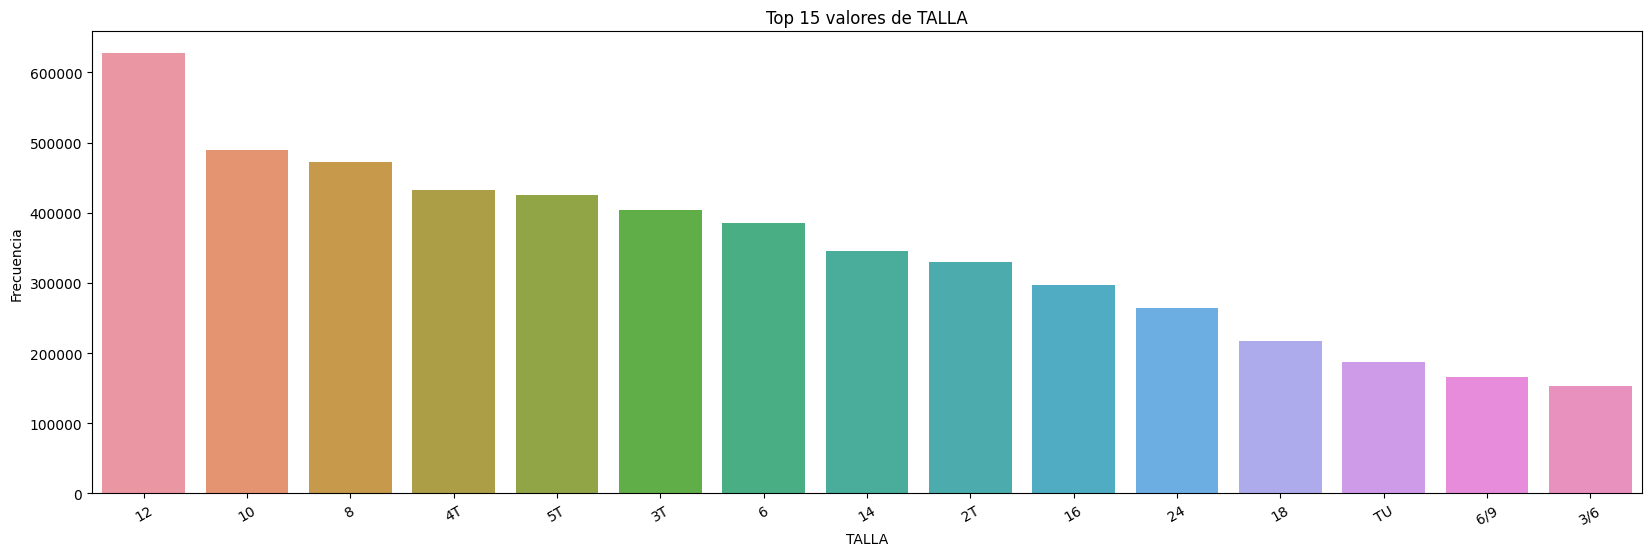

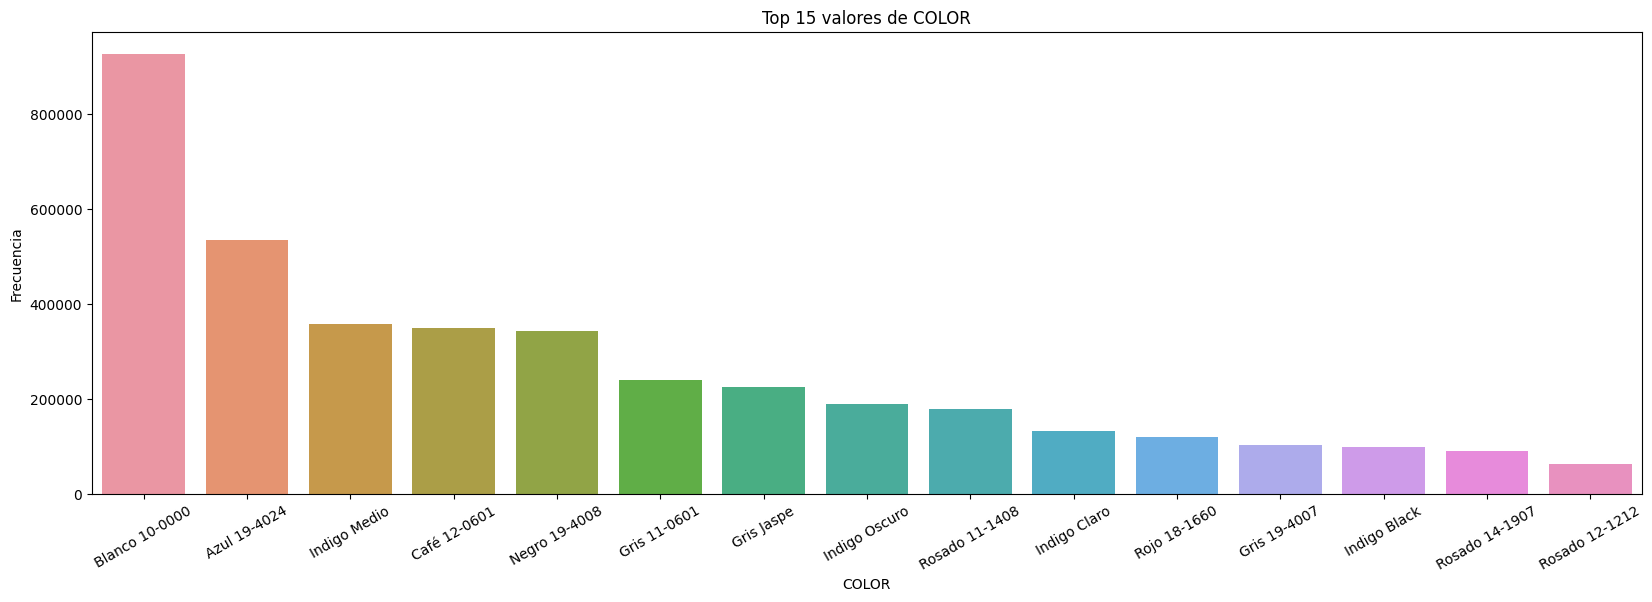

In [16]:
# Visualización univariable TOP 15:
for variable in variables_categoricas:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=variable, data=data, order=data[variable].value_counts().index[:15])
    plt.title(f'Top 15 valores de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=30)
    plt.show()

**Artículos más vendidos por cada tienda**

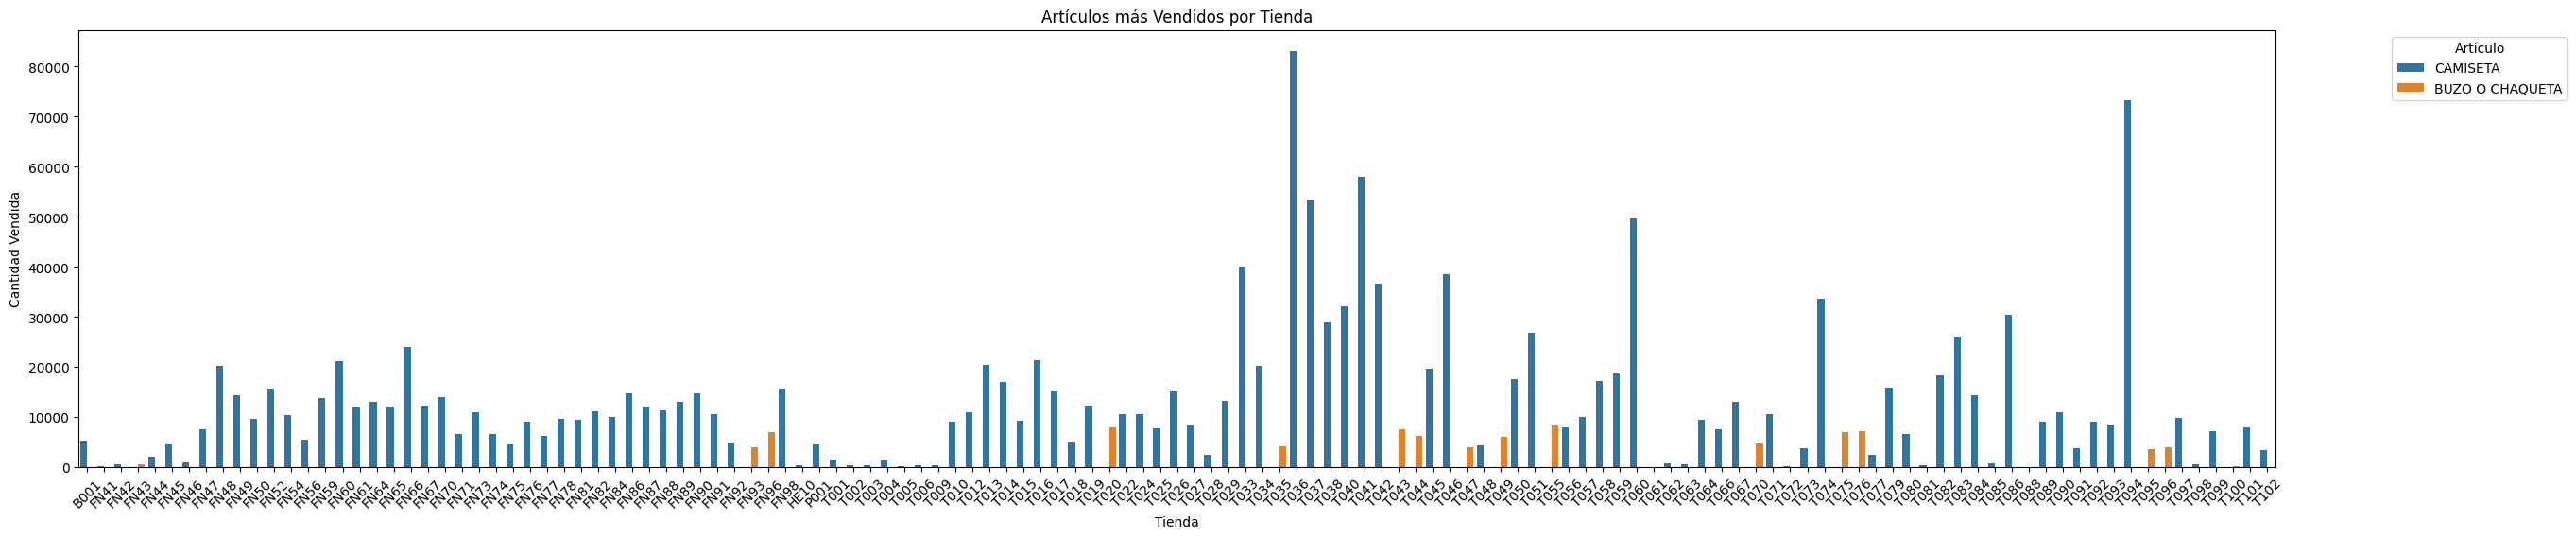

Artículos más vendidos por cada tienda:
            Artículo Centro  Cantidad
624         CAMISETA   B001      5175
625         CAMISETA   FN41        70
626         CAMISETA   FN42       457
247  BUZO O CHAQUETA   FN43       549
628         CAMISETA   FN44      2042
..               ...    ...       ...
748         CAMISETA   T098       447
749         CAMISETA   T099      7078
369  BUZO O CHAQUETA   T100       230
751         CAMISETA   T101      7888
752         CAMISETA   T102      3361

[129 rows x 3 columns]


In [24]:
# Crear un DataFrame con las ventas totales por artículo y tienda
ventas_por_articulo_tienda = data.groupby(['Artículo', 'Centro'])['Cantidad'].sum().reset_index()

# Encontrar el artículo más vendido por cada tienda
articulos_mas_vendidos_por_tienda = ventas_por_articulo_tienda.loc[ventas_por_articulo_tienda.groupby('Centro')['Cantidad'].idxmax()]

# Crear una gráfica de barras para los artículos más vendidos por tienda
plt.figure(figsize=(30, 6))
sns.barplot(x='Centro', y='Cantidad', hue='Artículo', data=articulos_mas_vendidos_por_tienda)
plt.title("Artículos más Vendidos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title='Artículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mostrar los artículos más vendidos por cada tienda
print("Artículos más vendidos por cada tienda:")
print(articulos_mas_vendidos_por_tienda)

**Artículo más vendido por cada año**

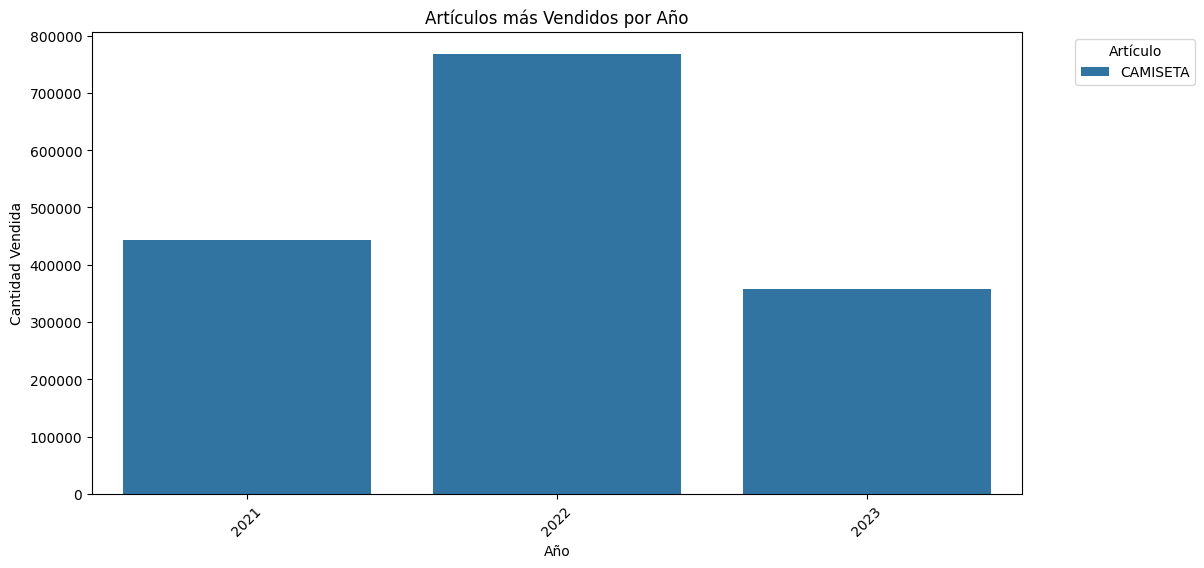

In [28]:
# Extraer el año de la columna 'Año/Mes'
data['Año'] = pd.to_datetime(data['Año/Mes'], format='%Y|%m').dt.year

# Calcular las ventas totales por artículo y año
ventas_por_articulo_año = data.groupby(['Artículo', 'Año'])['Cantidad'].sum().reset_index()

# Encontrar el artículo más vendido por cada año
articulos_mas_vendidos_por_año = ventas_por_articulo_año.loc[ventas_por_articulo_año.groupby('Año')['Cantidad'].idxmax()]

#  gráfica de barras.
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Cantidad', hue='Artículo', data=articulos_mas_vendidos_por_año)
plt.title("Artículos más Vendidos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title='Artículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Ventas totales por color**

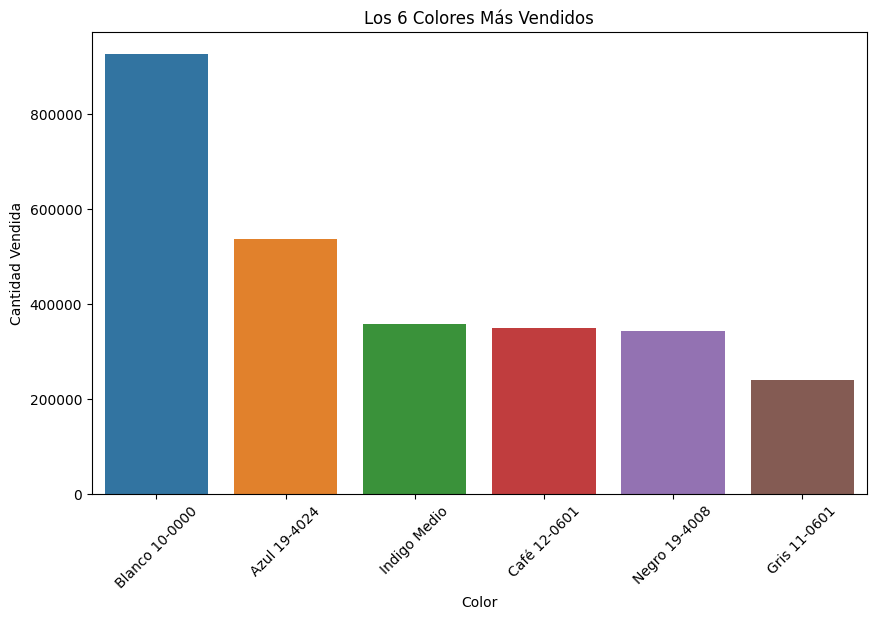

In [30]:
# Calcular las ventas totales por color
ventas_por_color = data.groupby('COLOR')['Cantidad'].sum().reset_index()

# Ordenar los colores por cantidad vendida de forma descendente
colores_mas_vendidos = ventas_por_color.sort_values(by='Cantidad', ascending=False).head(6)

# Crear una gráfica de barras para los 6 colores más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x='COLOR', y='Cantidad', data=colores_mas_vendidos)
plt.title("Los 6 Colores Más Vendidos")
plt.xlabel("Color")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()

 Material más vendido por cada año

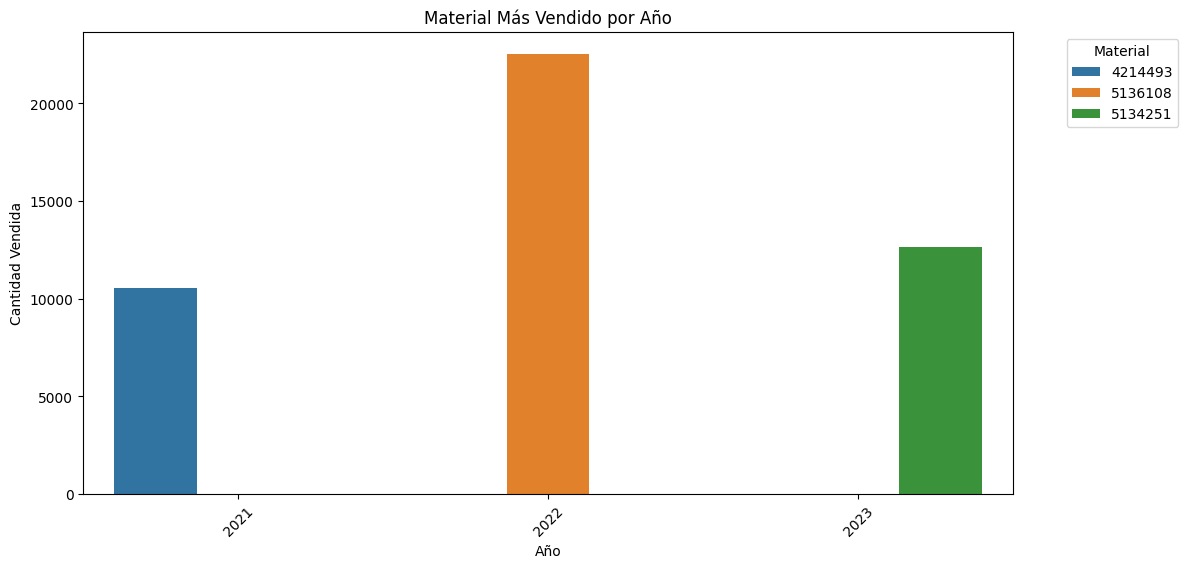

In [31]:

# Extraer el año de la columna 'Año/Mes'
data['Año'] = pd.to_datetime(data['Año/Mes'], format='%Y|%m').dt.year

# Calcular las ventas totales por material y año
ventas_por_material_año = data.groupby(['Material', 'Año'])['Cantidad'].sum().reset_index()

# Encontrar el material más vendido por cada año
material_mas_vendido_por_año = ventas_por_material_año.loc[ventas_por_material_año.groupby('Año')['Cantidad'].idxmax()]

# Crear una gráfica de barras para los materiales más vendidos por año
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Cantidad', hue='Material', data=material_mas_vendido_por_año)
plt.title("Material Más Vendido por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Producto más vendido por cada mes**

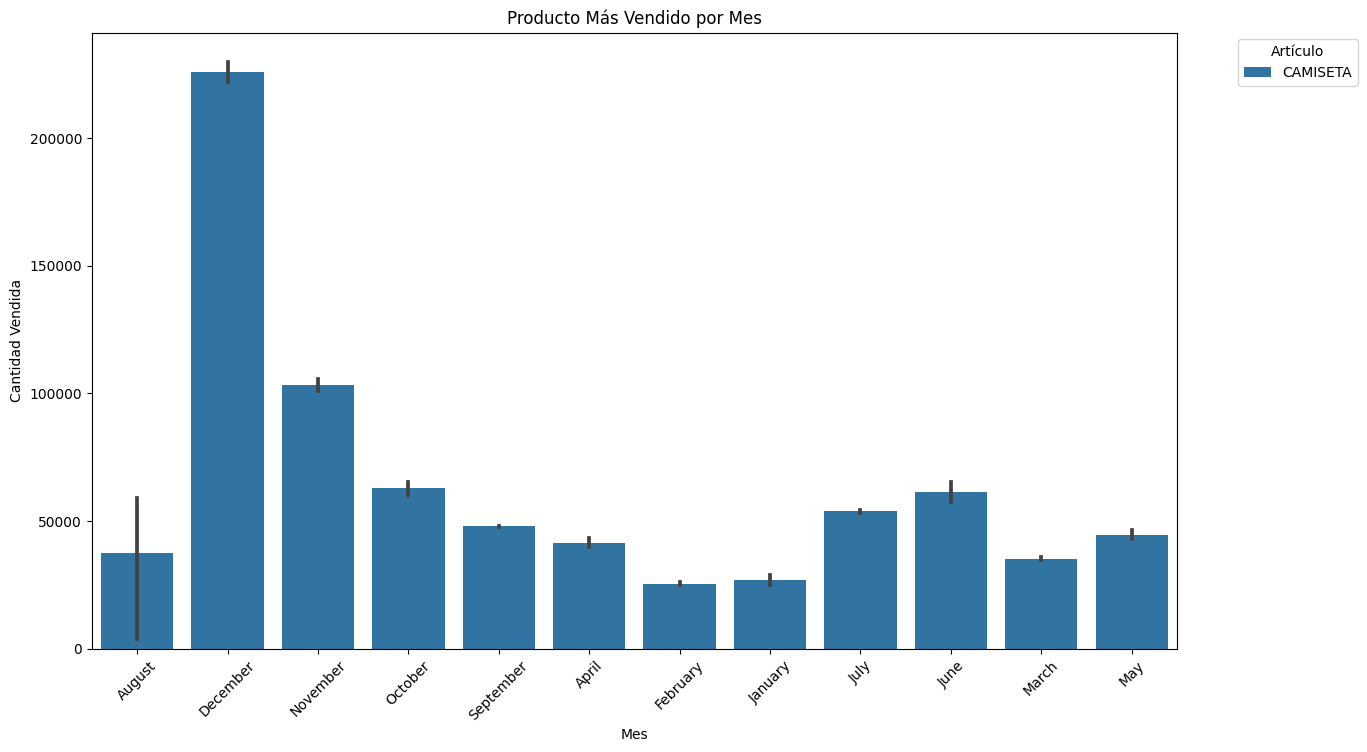

In [32]:
# Extraer el año y el mes de la columna 'Año/Mes'
data['Año'] = pd.to_datetime(data['Año/Mes'], format='%Y|%m').dt.year
data['Mes'] = pd.to_datetime(data['Año/Mes'], format='%Y|%m').dt.month_name()

# Calcular las ventas totales por producto, año y mes
ventas_por_producto_mes = data.groupby(['Artículo', 'Año', 'Mes'])['Cantidad'].sum().reset_index()

# Encontrar el producto más vendido por cada mes
producto_mas_vendido_por_mes = ventas_por_producto_mes.loc[ventas_por_producto_mes.groupby(['Año', 'Mes'])['Cantidad'].idxmax()]

# Crear una gráfica de barras para los productos más vendidos por mes
plt.figure(figsize=(14, 8))
sns.barplot(x='Mes', y='Cantidad', hue='Artículo', data=producto_mas_vendido_por_mes)
plt.title("Producto Más Vendido por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title='Artículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Predicción de Ventas Mensuales proximos meses**



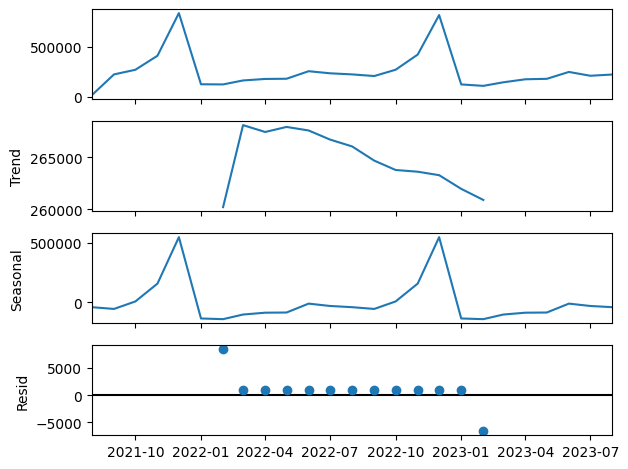

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


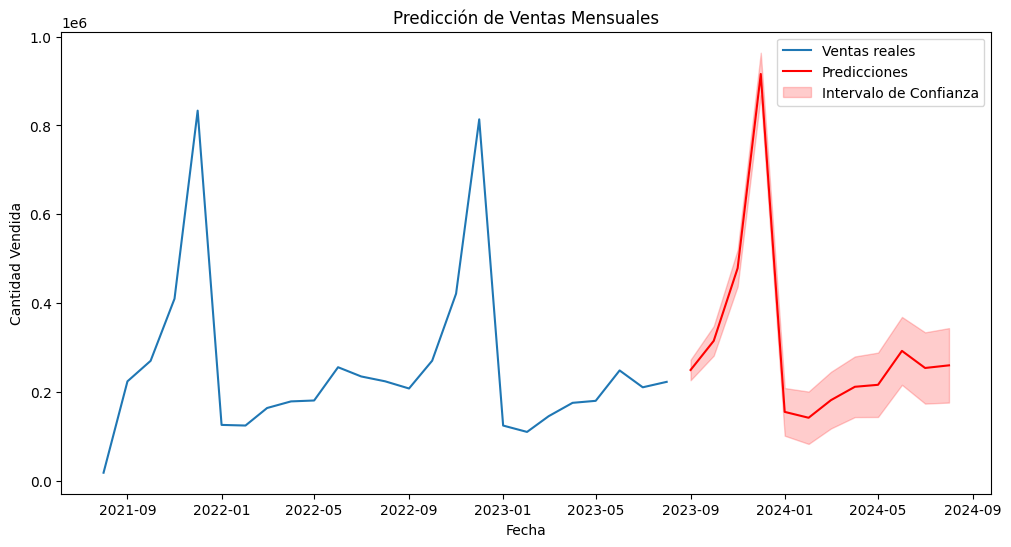

In [33]:
import statsmodels.api as sm

# Suponiendo que 'data' es tu DataFrame y ya has convertido la columna 'Año/Mes' a formato datetime
data['Año/Mes'] = pd.to_datetime(data['Año/Mes'], format='%Y|%m')

# Agrupar las ventas totales por mes
ventas_totales_por_mes = data.groupby('Año/Mes')['Cantidad'].sum().reset_index()

# Configurar el índice de la serie temporal
ventas_totales_por_mes = ventas_totales_por_mes.set_index('Año/Mes')

# Descomposición de la serie temporal para analizar tendencia, estacionalidad y residuos
resultados = sm.tsa.seasonal_decompose(ventas_totales_por_mes, model='additive')
resultados.plot()
plt.show()

# Ajustar un modelo SARIMA (Seasonal Autoregressive Integrated Moving Average)
modelo = sm.tsa.SARIMAX(ventas_totales_por_mes, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
ajuste_modelo = modelo.fit()

# Realizar predicciones para los próximos 12 meses
predicciones = ajuste_modelo.get_forecast(steps=12)
intervalo_prediccion = predicciones.conf_int()

# Visualizar las predicciones y el intervalo de confianza
plt.figure(figsize=(12, 6))
plt.plot(ventas_totales_por_mes.index, ventas_totales_por_mes, label='Ventas reales')
plt.plot(predicciones.predicted_mean.index, predicciones.predicted_mean, color='red', label='Predicciones')
plt.fill_between(intervalo_prediccion.index, intervalo_prediccion.iloc[:, 0], intervalo_prediccion.iloc[:, 1], color='red', alpha=0.2, label='Intervalo de Confianza')
plt.title('Predicción de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()